In [1]:
pip install snowflake-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install snowflake-sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "snowflake-connector-python[pandas]"

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install jupyter_scheduler

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
import getpass
import seaborn as sns
%matplotlib inline
import snowflake.connector


In [8]:
conn = snowflake.connector.connect(
        user = 'SONAL',
        password = getpass.getpass('Your Snowflake Password: '),
        ##password= '',
        account = 'luympbj-mc26834',
        database='RETAIL',
        schema='PUBLIC',
        warehouse='COMPUTE_WH' )

Your Snowflake Password: ········


In [9]:
cur = conn.cursor()

In [10]:
select_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
select_DEMOGRAPHIC_RAW = 'SELECT * FROM DEMOGRAPHIC_RAW'
select_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'
select_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_CAMPAIGN_RAW       = 'SELECT * FROM CAMPAIGN_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'

In [11]:
cur.execute(select_DEMOGRAPHIC_RAW)
DEMOGRAPHIC_RAW = cur.fetch_pandas_all()

In [12]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [13]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [14]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [15]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [16]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [17]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [18]:
cur.close()
conn.close()

In [19]:
DEMOGRAPHIC_RAW.head(5)

,AGE_DESC,MARITIAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [20]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [21]:
CAMPAIGN_RAW.head(5)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [22]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [23]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [24]:
COUPON_REDEMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [25]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,95,29019408074,154,5588666,1,0.39,321,0.00,1753,23,0,0
1,95,29019408074,154,5588942,1,0.39,321,0.00,1753,23,0,0
2,95,29019408074,154,5590287,1,0.39,321,0.00,1753,23,0,0
3,1578,29019408932,154,1028950,1,1.49,321,0.00,2012,23,0,0
4,1578,29019408932,154,1045515,2,0.80,321,-0.98,2012,23,0,0


In [26]:

 PRODUCT_RAW;
DEMOGRAPHIC_RAW;
TRANSACTION_RAW;
COUPON_RAW;
COUPON_REDEMPT_RAW;
CAMPAIGN_RAW;
CAMPAIGN_DESC_RAW;                                                                  


In [27]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [28]:
DEMOGRAPHIC_RAW.isnull().sum()

AGE_DESC                0
MARITIAL_STATUS_CODE    0
INCOME_DESC             0
HOMEOWNER_DESC          0
HH_COMP_DESC            0
HOUSEHOLD_SIZE_DESC     0
KID_CATEGORY_DESC       0
HOUSEHOLD_KEY           0
dtype: int64

In [29]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [30]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [31]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [32]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [33]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [34]:
from datetime import datetime,timedelta

In [35]:
Start_date=pd.to_datetime('2020-01-01')

In [36]:
Start_date

Timestamp('2020-01-01 00:00:00')

In [37]:
TRANSACTION_RAW['Date'] = Start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'],unit='D')

In [38]:
TRANSACTION_RAW['Date'].head(5)

0   2020-06-03
1   2020-06-03
2   2020-06-03
3   2020-06-03
4   2020-06-03
Name: Date, dtype: datetime64[ns]

In [39]:
CAMPAIGN_DESC_RAW['Start_date']= Start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],unit='D')

In [40]:
CAMPAIGN_DESC_RAW['End_date']= Start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],unit='D')

In [41]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date
0,TypeB,24,659,719,2021-10-21,2021-12-20
1,TypeC,15,547,708,2021-07-01,2021-12-09
2,TypeB,25,659,691,2021-10-21,2021-11-22
3,TypeC,20,615,685,2021-09-07,2021-11-16
4,TypeB,23,646,684,2021-10-08,2021-11-15
5,TypeB,21,624,656,2021-09-16,2021-10-18
6,TypeB,22,624,656,2021-09-16,2021-10-18
7,TypeA,18,587,642,2021-08-10,2021-10-04
8,TypeB,19,603,635,2021-08-26,2021-09-27
9,TypeB,17,575,607,2021-07-29,2021-08-30


In [42]:
COUPON_REDEMPT_RAW['Date'] = Start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'],unit='D')

In [43]:
COUPON_REDEMPT_RAW.head(10)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20
5,8,422,53600000078,8,2021-02-26
6,13,396,53700048182,5,2021-01-31
7,13,424,10000085364,8,2021-02-28
8,13,434,53600000078,8,2021-03-10
9,13,447,52370020076,8,2021-03-23


In [44]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION            object
CAMPAIGN                 int8
START_DAY               int16
END_DAY                 int16
Start_date     datetime64[ns]
End_date       datetime64[ns]
dtype: object

In [45]:
CAMPAIGN_DESC_RAW['Campaign_Duration'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [46]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date,Campaign_Duration
0,TypeB,24,659,719,2021-10-21,2021-12-20,60
1,TypeC,15,547,708,2021-07-01,2021-12-09,161
2,TypeB,25,659,691,2021-10-21,2021-11-22,32
3,TypeC,20,615,685,2021-09-07,2021-11-16,70
4,TypeB,23,646,684,2021-10-08,2021-11-15,38


<AxesSubplot:xlabel='CAMPAIGN', ylabel='Campaign_Duration'>

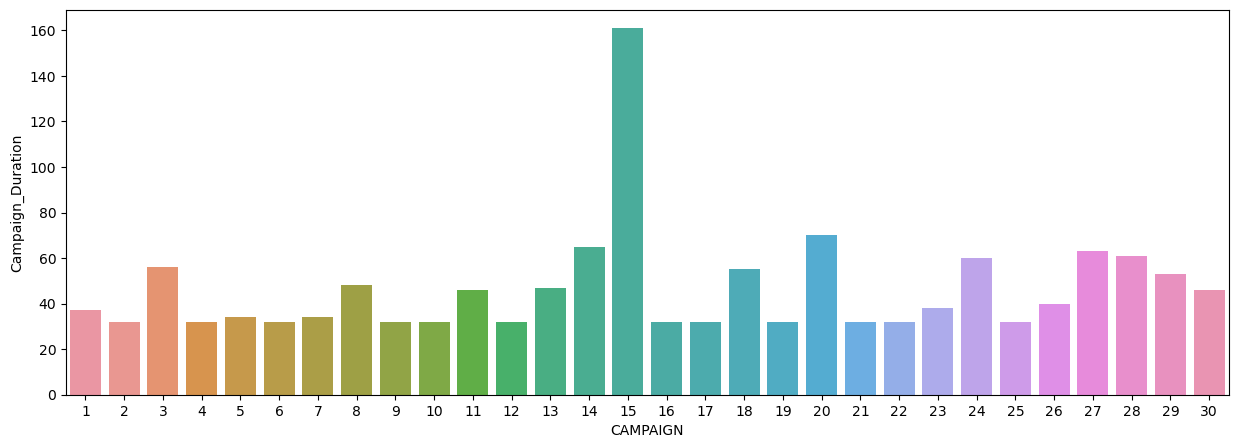

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x= 'CAMPAIGN', y = 'Campaign_Duration', data = CAMPAIGN_DESC_RAW )

In [52]:
CAMPAIGN_DESC_RAW['Campaign_Duration'].mean()

46.6

In [53]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','Campaign_Duration':'mean'})

,CAMPAIGN,Campaign_Duration
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


**There have been 19 type B campaigns, whose average length was 38 days. In comparison, there has been 6 type C campaigns of 75 days on average.**

In [54]:
CAMPAIGN_DESC_RAW['Start_month'] = CAMPAIGN_DESC_RAW['Start_date'].dt.strftime('%m')

In [55]:
CAMPAIGN_DESC_RAW['End_month'] = CAMPAIGN_DESC_RAW['End_date'].dt.strftime('%m')

In [56]:
CAMPAIGN_DESC_RAW['Start_Year'] = CAMPAIGN_DESC_RAW['Start_date'].dt.strftime('%Y')

In [57]:
CAMPAIGN_DESC_RAW['End_Year'] = CAMPAIGN_DESC_RAW['End_date'].dt.strftime('%Y')

In [58]:
CAMPAIGN_DESC_RAW.head(4)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11,2021,2021


In [59]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
START_DAY                     int16
END_DAY                       int16
Start_date           datetime64[ns]
End_date             datetime64[ns]
Campaign_Duration             int16
Start_month                  object
End_month                    object
Start_Year                   object
End_Year                     object
dtype: object

In [60]:
CAMPAIGN_RAW.shape

(7208, 3)

In [61]:
CAMPAIGN_RAW.columns

Index(['DESCRIPTION', 'HOUSEHOLD_KEY', 'CAMPAIGN'], dtype='object')

In [62]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [63]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

In [64]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2500

**There are 1584 households have participed to the campaign, leaving 916 households who never participated to any campaign.**

In [65]:
CAMPAIGN_RAW.dtypes

DESCRIPTION      object
HOUSEHOLD_KEY     int16
CAMPAIGN           int8
dtype: object

In [66]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY')['CAMPAIGN'].count()

HOUSEHOLD_KEY
1       8
2       1
3       3
4       1
6       4
       ..
2496    5
2497    3
2498    6
2499    2
2500    8
Name: CAMPAIGN, Length: 1584, dtype: int64

Text(0, 0.5, 'Number of Households Reached To')

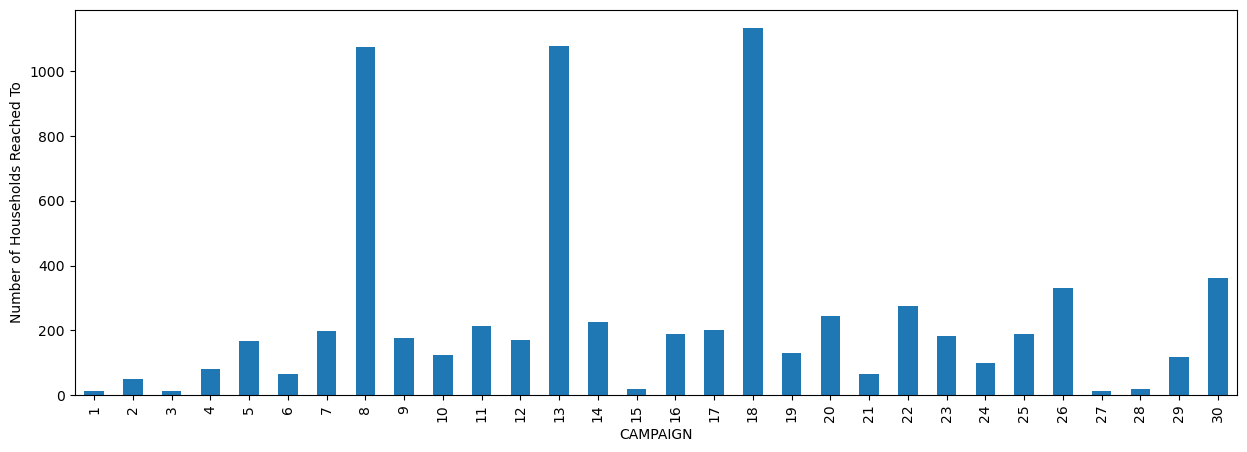

In [67]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of Households Reached To')

**In Campaing 18 maximum number of households are participated.**

In [68]:
COUPON_RAW.shape

(124548, 3)

In [69]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [70]:
COUPON_RAW['COUPON_UPC'].nunique()

1135

In [71]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [72]:
COUPON_RAW.dtypes

COUPON_UPC    int64
PRODUCT_ID    int32
CAMPAIGN       int8
dtype: object

In [73]:
Coupon_Given=COUPON_RAW.groupby("CAMPAIGN").aggregate(Total_product = ('PRODUCT_ID','nunique'),
  Total_Coupon_Given = ('COUPON_UPC','nunique'))

In [74]:
Coupon_Given.sort_values(by='Total_product',ascending=False).head(10)

,Total_product,Total_Coupon_Given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181
22,1917,21
24,1887,2
16,1025,13
25,826,17


In [75]:
Coupon_Given.head(10)

,Total_product,Total_Coupon_Given
CAMPAIGN,,
1,383,11
2,301,16
3,506,34
4,200,12
5,443,11
6,18,1
7,259,8
8,17178,209
9,825,18


In [76]:
Coupon_Given = Coupon_Given.merge(right = CAMPAIGN_DESC_RAW,on='CAMPAIGN',how='left')

In [77]:
Coupon_Given.head(10)

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021
5,6,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,2021,2021
6,7,259,8,TypeB,398,432,2021-02-02,2021-03-08,34,02,03,2021,2021
7,8,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,02,04,2021,2021
8,9,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,03,04,2021,2021
9,10,393,14,TypeB,463,495,2021-04-08,2021-05-10,32,04,05,2021,2021


In [78]:
Coupon_Given.columns

Index(['CAMPAIGN', 'Total_product', 'Total_Coupon_Given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'Start_date', 'End_date', 'Campaign_Duration',
       'Start_month', 'End_month', 'Start_Year', 'End_Year'],
      dtype='object')

In [79]:
Coupon_Given.loc[:,('CAMPAIGN','Total_product','Total_Coupon_Given','Start_Year','End_Year','Start_month','End_month','DESCRIPTION','Campaign_Duration')].sort_values(by='Total_product',
                    ascending=False).head(10)

,CAMPAIGN,Total_product,Total_Coupon_Given,Start_Year,End_Year,Start_month,End_month,DESCRIPTION,Campaign_Duration
12,13,35616,207,2021,2021,05,07,TypeA,47
17,18,35513,209,2021,2021,08,10,TypeA,55
7,8,17178,209,2021,2021,02,04,TypeA,48
25,26,3396,181,2020,2020,08,09,TypeA,40
29,30,3205,181,2020,2021,11,01,TypeA,46
21,22,1917,21,2021,2021,09,10,TypeB,32
23,24,1887,2,2021,2021,10,12,TypeB,60
15,16,1025,13,2021,2021,07,08,TypeB,32
24,25,826,17,2021,2021,10,11,TypeB,32
8,9,825,18,2021,2021,03,04,TypeB,32


In [80]:
COUPON_RAW.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [81]:
PRODUCT_RAW.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


**campaign 13,18,8 are the one with most product in them.**

In [82]:
coupon_product = COUPON_RAW.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

In [83]:
coupon_product.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [84]:
coupon_product.isnull().sum()

COUPON_UPC              0
PRODUCT_ID              0
CAMPAIGN                0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

**Top 10 product on which the Coupon has been applied**

In [85]:
coupon_product['COMMODITY_DESC'].value_counts().head(10)

HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
ICE CREAM/MILK/SHERBTS    3257
CHEESE                    3146
YOGURT                    2460
ORAL HYGIENE PRODUCTS     2437
LUNCHMEAT                 2425
Name: COMMODITY_DESC, dtype: int64

**Most prominent products among coupons created are bathroom products such as hair care and makeup.**

In [86]:
COUPON_REDEMPT_RAW.shape

(2318, 5)

In [87]:
COUPON_REDEMPT_RAW.columns

Index(['HOUSEHOLD_KEY', 'DAY', 'COUPON_UPC', 'CAMPAIGN', 'Date'], dtype='object')

In [88]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

**Only 556 Coupon has been used out of 1135**

<AxesSubplot:xlabel='CAMPAIGN'>

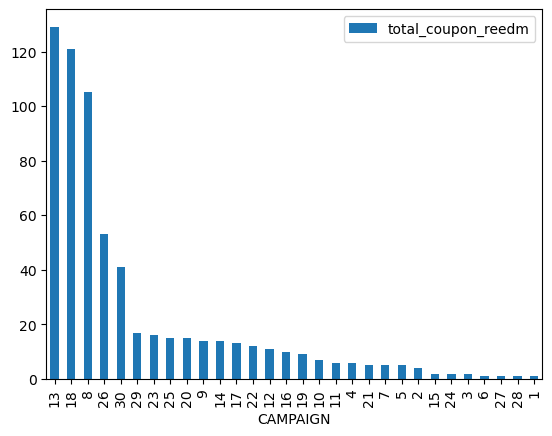

In [89]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique')).sort_values(by='total_coupon_reedm',ascending=False).plot.bar()

In [90]:
Coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique'))

In [91]:
Coupon_redeem.sort_values(by = 'total_coupon_reedm',ascending=False)

,total_coupon_reedm
CAMPAIGN,
13,129
18,121
8,105
26,53
30,41
29,17
23,16
25,15
20,15


In [92]:
Coupon_Given.head()

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


In [93]:
Coupon_redeem.head(3)

,total_coupon_reedm
CAMPAIGN,
1,1
2,4
3,2


In [94]:
Coupon_redeem = Coupon_redeem.merge(right = Coupon_Given,on='CAMPAIGN',how='left')

In [95]:
Coupon_redeem.head()

,CAMPAIGN,total_coupon_reedm,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


In [96]:
Coupon_redeem['Coupon_redeem_rate']=(Coupon_redeem['total_coupon_reedm']/Coupon_redeem['Total_Coupon_Given'])*100

In [97]:
Coupon_redeem.head().sort_values(by = 'Coupon_redeem_rate',ascending = False)

,CAMPAIGN,total_coupon_reedm,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year,Coupon_redeem_rate
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021,50.000000
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021,45.454545
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021,25.000000
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021,9.090909
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021,5.882353


<AxesSubplot:xlabel='CAMPAIGN', ylabel='Coupon_redeem_rate'>

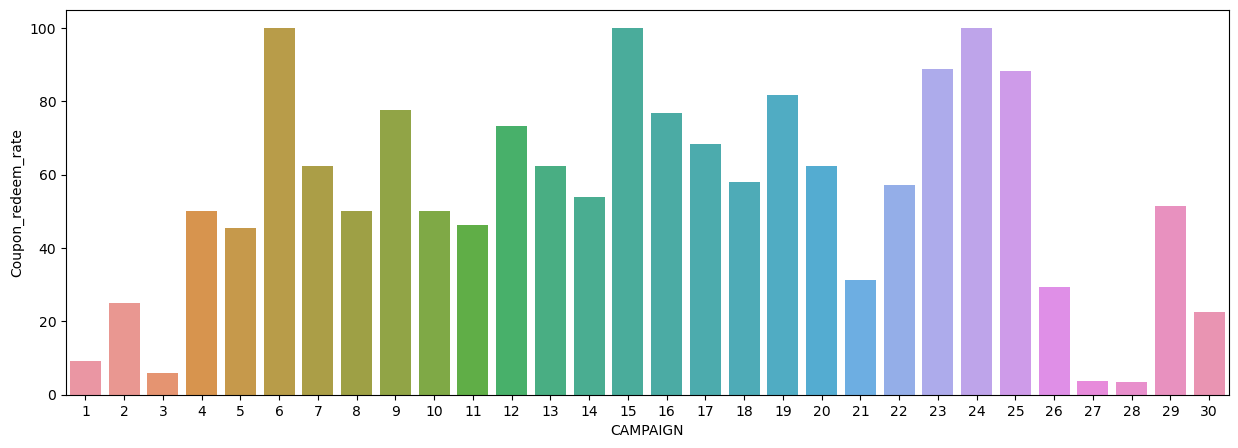

In [98]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Coupon_redeem_rate',data=Coupon_redeem)

In [99]:
TRANSACTION_RAW.shape

(2595732, 13)

In [100]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [101]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
Date                 0
dtype: int64

In [102]:
TRANSACTION_RAW['BASKET_ID'].count()

2595732

In [103]:
TRANSACTION_RAW['BASKET_ID'].nunique()

276484

In [104]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2500

In [105]:
trnx_bucket =TRANSACTION_RAW.groupby('BASKET_ID').aggregate({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

In [106]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


In [107]:
trnx_bucket['Use_coupon'] = trnx_bucket['COUPON_DISC']!=0

In [108]:
trnx_bucket['Use_coupon'].value_counts()

False    260812
True      15672
Name: Use_coupon, dtype: int64

In [109]:
trnx_bucket.sort_values('SALES_VALUE',ascending=False).head(10)

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,Use_coupon
BASKET_ID,,,,
32006114302,961.49,0,0,False
40387571385,681.58,0,0,False
33347880492,552.92,-3,0,True
32505140858,545.17,0,0,False
30983766334,545.07,0,0,False
35638473903,543.83,0,0,False
34267311742,518.01,0,0,False
30515165970,508.58,0,0,False
32187143334,499.99,0,0,False


In [110]:
round(trnx_bucket['SALES_VALUE'].mean(),2)

29.14

The average basket value is $29.14

Text(0.5, 1.0, 'Basket value boxplot')

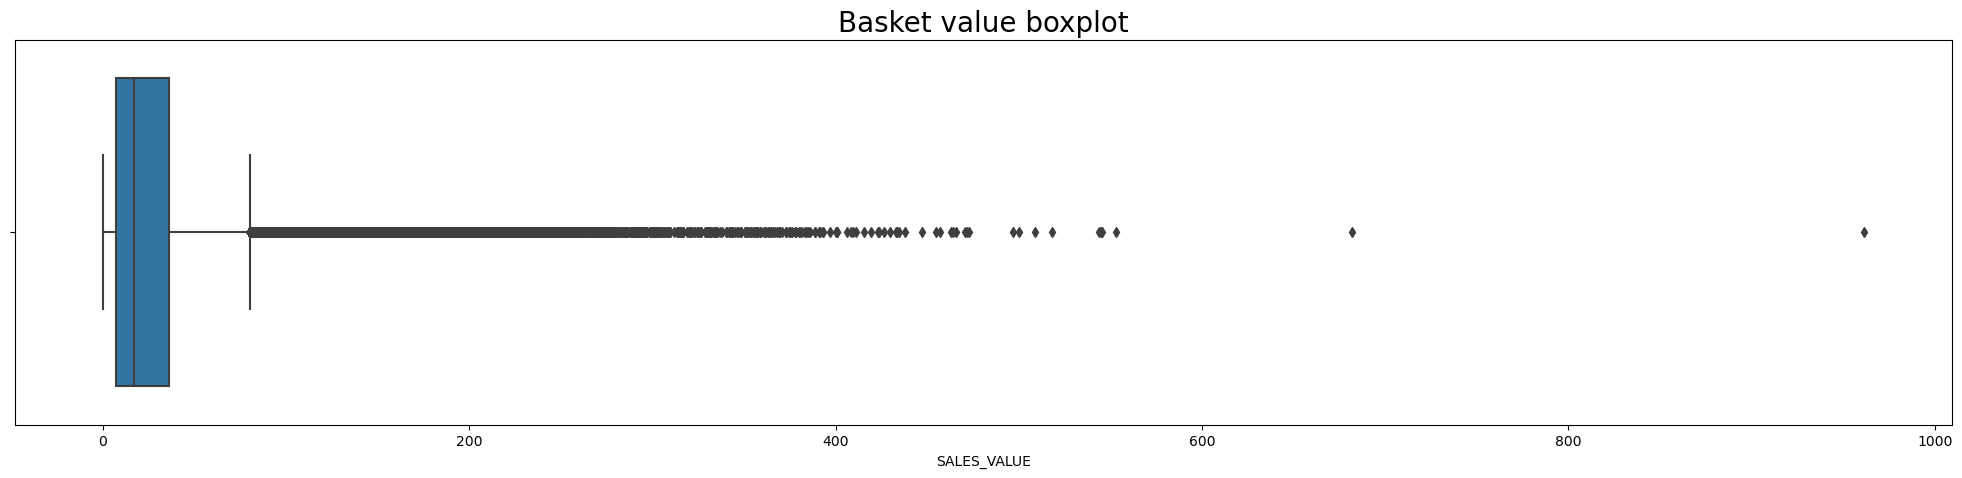

In [111]:
plt.figure(figsize=(25,5))
sns.boxplot(x=trnx_bucket['SALES_VALUE'])
plt.title('Basket value boxplot', fontsize = 20)

In [112]:
trnx_bucket.groupby('Use_coupon').aggregate( sales_mean=('SALES_VALUE','mean'),
                                             COUPON_DISC_mean =('COUPON_DISC','mean'),
                                             COUPON_MATCH_DISC=('COUPON_MATCH_DISC','mean'),
                                             No_coupon  =('SALES_VALUE','count'))

,sales_mean,COUPON_DISC_mean,COUPON_MATCH_DISC,No_coupon
Use_coupon,,,,
False,26.795021,0.000000,-0.000019,260812
True,68.210833,-2.986536,-0.426748,15672


The average basket value without a coupon is $26.79.

The average basket value with a coupon is $68.21.

The average discount generated by coupons is $2.98.

**It shows that customeer purchase more product when coupon is given to them**

In [113]:
trnx_desc = TRANSACTION_RAW.merge(right= trnx_bucket,on='BASKET_ID',how='left')

In [114]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,Use_coupon
0,95,29019408074,154,5588666,1,0.39,321,0.00,1753,23,0,0,2020-06-03,12.03,0,0,False
1,95,29019408074,154,5588942,1,0.39,321,0.00,1753,23,0,0,2020-06-03,12.03,0,0,False
2,95,29019408074,154,5590287,1,0.39,321,0.00,1753,23,0,0,2020-06-03,12.03,0,0,False
3,1578,29019408932,154,1028950,1,1.49,321,0.00,2012,23,0,0,2020-06-03,6.06,0,0,False
4,1578,29019408932,154,1045515,2,0.80,321,-0.98,2012,23,0,0,2020-06-03,6.06,0,0,False


In [115]:
trnx_desc= trnx_desc.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

In [116]:
trnx_desc.head(3)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,Use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,95,29019408074,154,5588666,1,0.39,321,0.0,1753,23,...,12.03,0,0,False,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
1,95,29019408074,154,5588942,1,0.39,321,0.0,1753,23,...,12.03,0,0,False,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
2,95,29019408074,154,5590287,1,0.39,321,0.0,1753,23,...,12.03,0,0,False,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ


In [117]:
trnx_desc.drop(['SALES_VALUE_y','COUPON_DISC_y','COUPON_MATCH_DISC_y'],axis=1,inplace=True)

In [118]:
trnx_desc.head(10)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,Use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,95,29019408074,154,5588666,1,0.39,321,0.00,1753,23,0,0,2020-06-03,False,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
1,95,29019408074,154,5588942,1,0.39,321,0.00,1753,23,0,0,2020-06-03,False,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
2,95,29019408074,154,5590287,1,0.39,321,0.00,1753,23,0,0,2020-06-03,False,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
3,1578,29019408932,154,1028950,1,1.49,321,0.00,2012,23,0,0,2020-06-03,False,869,GROCERY,National,SOUP,DRY SOUP,2 CT
4,1578,29019408932,154,1045515,2,0.80,321,-0.98,2012,23,0,0,2020-06-03,False,1446,GROCERY,National,VEGETABLES - SHELF STABLE,CORN,15.25 OZ
5,1578,29019408932,154,1074608,2,1.78,321,-0.20,2012,23,0,0,2020-06-03,False,577,GROCERY,National,DRY BN/VEG/POTATO/RICE,POTATOES: DRY,4 OZ
6,1578,29019408932,154,1116821,1,1.99,321,0.00,2012,23,0,0,2020-06-03,False,673,PRODUCE,National,MUSHROOMS,MUSHROOMS W/WHOLE PKG,8 OZ
7,684,29019410246,154,6534178,10166,25.00,422,-0.01,811,23,0,0,2020-06-03,False,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
8,1466,29019410477,154,949294,2,8.58,422,0.00,949,23,0,0,2020-06-03,False,2,PASTRY,National,BREAKFAST SWEETS,SW GDS:DONUTS,DOZEN
9,1577,29019412977,154,847049,1,1.50,422,-0.29,1719,23,0,0,2020-06-03,False,69,GROCERY,Private,COLD CEREAL,KIDS CEREAL,14 OZ


In [119]:
COMMODITY_Coupon = trnx_desc.groupby('COMMODITY_DESC').aggregate(total_quantity=('QUANTITY','count'),
                                             Use_coupon=('Use_coupon','sum'),
                                             Coupon=('COUPON_DISC_x','sum'))

In [120]:
COMMODITY_Coupon.head(10)

,total_quantity,Use_coupon,Coupon
COMMODITY_DESC,,,
,7839,6019,-10596.0
(CORP USE ONLY),61,5,0.0
ADULT INCONTINENCE,553,87,-37.0
AIR CARE,5556,1320,-929.0
ANALGESICS,4769,692,-13.0
ANTACIDS,1889,280,-22.0
APPAREL,510,59,-1.0
APPLES,14440,2209,0.0
AUDIO/VIDEO PRODUCTS,1073,125,-46.0


In [121]:
COMMODITY_Coupon['Coupon%']=round((COMMODITY_Coupon['Use_coupon']/COMMODITY_Coupon['total_quantity'])*100,2)

In [122]:
COMMODITY_Coupon.sort_values('Coupon%',ascending=False).head(30)

,total_quantity,Use_coupon,Coupon,Coupon%
COMMODITY_DESC,,,,
,7839,6019,-10596.0,76.78
BABY FOODS,20356,5648,-349.0,27.75
RESTRICTED DIET,51,13,0.0,25.49
DIAPERS & DISPOSABLES,5008,1216,-1110.0,24.28
AIR CARE,5556,1320,-929.0,23.76
FRZN SEAFOOD,64,15,0.0,23.44
BULK FOODS,9,2,0.0,22.22
BABY HBC,4626,1020,-325.0,22.05
FRZN BREAKFAST FOODS,10595,2286,-421.0,21.58


**While the most prominents products for which coupons are created are haircare and makeup products, coupons are mostly used on drinks, cigarettes, diapers, etc. Bathroom products are not even among the top 10**

In [123]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY','WEEK_NO','DAY']).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                  'COUPON_DISC' :'sum','COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          100     695        57.68       -14.85           -2   
                      698        50.54       -14.72           -2   
              101     704        73.65       -19.79           -2   
              102     706        13.95        -0.42            0   
                      708        45.12       -15.99           -1   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          100     695                  0  
                      698                  0  
              101     704                  0  
              102     706                  0  
                      708                  0  

[225533 rows x 4 columns]

In [124]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,95,29019408074,154,5588666,1,0.39,321,0.00,1753,23,0,0,2020-06-03
1,95,29019408074,154,5588942,1,0.39,321,0.00,1753,23,0,0,2020-06-03
2,95,29019408074,154,5590287,1,0.39,321,0.00,1753,23,0,0,2020-06-03
3,1578,29019408932,154,1028950,1,1.49,321,0.00,2012,23,0,0,2020-06-03
4,1578,29019408932,154,1045515,2,0.80,321,-0.98,2012,23,0,0,2020-06-03


In [125]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['Date'].dt.year).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                   'COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
Date,,,
2020,3645902.74,-641463.08,-18856.0
2021,4411560.34,-756871.76,-27949.0


**Sales Value increases as Retail Discount and Coupon Discount increases**

**Droping the columns**

In [126]:
from datetime import datetime

In [127]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],axis=1,inplace=True)

In [128]:
CAMPAIGN_DESC_RAW.head(3)

,DESCRIPTION,CAMPAIGN,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year
0,TypeB,24,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,11,2021,2021


In [129]:
CAMPAIGN_DESC_RAW['Start_date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['Start_date']).apply(lambda x: x.date())

In [130]:
type(CAMPAIGN_DESC_RAW['Start_date'])

pandas.core.series.Series

In [131]:
CAMPAIGN_DESC_RAW['Start_date'] 

0     2021-10-21
1     2021-07-01
2     2021-10-21
3     2021-09-07
4     2021-10-08
5     2021-09-16
6     2021-09-16
7     2021-08-10
8     2021-08-26
9     2021-07-29
10    2021-06-15
11    2021-07-15
12    2021-05-19
13    2021-04-22
14    2021-04-22
15    2021-04-08
16    2021-03-11
17    2021-02-16
18    2021-02-02
19    2021-01-28
20    2020-12-22
21    2021-01-12
22    2021-01-07
23    2020-12-12
24    2020-12-17
25    2020-11-19
26    2020-10-08
27    2020-09-16
28    2020-08-25
29    2020-08-12
Name: Start_date, dtype: object

In [132]:
CAMPAIGN_DESC_RAW['End_date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['End_date']).apply(lambda x: x.date())

In [133]:
type(CAMPAIGN_DESC_RAW['End_date'])

pandas.core.series.Series

In [134]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION          object
CAMPAIGN               int8
Start_date           object
End_date             object
Campaign_Duration     int16
Start_month          object
End_month            object
Start_Year           object
End_Year             object
dtype: object

In [135]:
COUPON_REDEMPT_RAW.drop(['DAY'],axis=1,inplace=True)

In [136]:
COUPON_REDEMPT_RAW.head(3)

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date
0,1,10000085364,8,2021-02-25
1,1,51700010076,8,2021-02-25
2,1,54200000033,8,2021-03-03


In [137]:
COUPON_REDEMPT_RAW['Date']=pd.to_datetime(COUPON_REDEMPT_RAW['Date']).apply(lambda x: x.date())

In [138]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

In [139]:
TRANSACTION_RAW.drop(['DAY','WEEK_NO'],axis=1,inplace=True)

In [140]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,95,29019408074,5588666,1,0.39,321,0.00,1753,0,0,2020-06-03
1,95,29019408074,5588942,1,0.39,321,0.00,1753,0,0,2020-06-03
2,95,29019408074,5590287,1,0.39,321,0.00,1753,0,0,2020-06-03
3,1578,29019408932,1028950,1,1.49,321,0.00,2012,0,0,2020-06-03
4,1578,29019408932,1045515,2,0.80,321,-0.98,2012,0,0,2020-06-03


In [141]:
TRANSACTION_RAW['Date']=pd.to_datetime(TRANSACTION_RAW['Date']).apply(lambda x: x.date())

In [142]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int32
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
Date                  object
dtype: object

In [143]:
TRANSACTION_RAW.head(10)

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,95,29019408074,5588666,1,0.39,321,0.00,1753,0,0,2020-06-03
1,95,29019408074,5588942,1,0.39,321,0.00,1753,0,0,2020-06-03
2,95,29019408074,5590287,1,0.39,321,0.00,1753,0,0,2020-06-03
3,1578,29019408932,1028950,1,1.49,321,0.00,2012,0,0,2020-06-03
4,1578,29019408932,1045515,2,0.80,321,-0.98,2012,0,0,2020-06-03
5,1578,29019408932,1074608,2,1.78,321,-0.20,2012,0,0,2020-06-03
6,1578,29019408932,1116821,1,1.99,321,0.00,2012,0,0,2020-06-03
7,684,29019410246,6534178,10166,25.00,422,-0.01,811,0,0,2020-06-03
8,1466,29019410477,949294,2,8.58,422,0.00,949,0,0,2020-06-03
9,1577,29019412977,847049,1,1.50,422,-0.29,1719,0,0,2020-06-03


**Now loading the table to Db**

In [159]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [160]:
conn = snowflake.connector.connect(
        user = 'SONAL',
        ##password = getpass.getpass('Your Snowflake Password: ')
        password=' ',
        account = 'luympbj-mc26834',
        database='RETAIL',
        warehouse='COMPUTE_WH',
        SCHEMA='PUBLIC',
        schema ='PUBLIC'
 ) 

In [161]:
cur=conn.cursor()

In [162]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)''')

In [163]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [164]:
CAMPAIGN_DESC_RAW.head() ## cleaned raw dataframe

,DESCRIPTION,CAMPAIGN,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year
0,TypeB,24,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,2021-10-08,2021-11-15,38,10,11,2021,2021


In [165]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_date date,
End_date  date,
Campaign_Duration NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10),
Start_Year INT,
End_Year INT)''')

In [166]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [167]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [168]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2595732


In [169]:
cur.close()
conn.close()

In [170]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,Start_date,End_date,Campaign_Duration,Start_month,End_month,Start_Year,End_Year
0,TypeB,24,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,2021-10-08,2021-11-15,38,10,11,2021,2021


In [ ]:
##CAMPAIGN_DESC_CLEANED = CAMPAIGN_DESC_RAW.copy()

In [ ]:
##from sqlalchemy import create_engine

In [ ]:
##connection_string = f"snowflake://{user}:{password}@{account}/{database}/{schema}?warehouse={warehouse}"

In [ ]:
##engine = create_engine(connection_string)

In [ ]:
##cur = conn.cursor()

In [ ]:
##CAMPAIGN_DESC_RAW.to_sql(con=engine,name="CAMPAIGN_DESC_New",if_exists="append",index=False)

In [ ]:
##COUPON_REDEMPT_RAW.to_sql(name="COUPON_REDEMPT_New",con=engine,if_exists="replace",index=False)

In [ ]:
##TRANSACTION_RAW.to_sql(name="TRANSACTION_New",con=engine,if_exists="replace",index=False)

In [ ]:
##TRANSACTION_RAW.shape

In [ ]:
##TRANSACTION_RAW.to_csv('TRANSACTION.csv',index=False)

In [ ]:
##chunk_size = 10000
##for chunk in pd.read_csv("TRANSACTION.csv", chunksize=chunk_size):
    ##chunk.to_sql('TRANSACTION_New',con= engine,if_exists='append', index=False)

In [ ]:
##chunk_size = 16000

In [ ]:
##chunks = [TRANSACTION_RAW[i:i+chunk_size] for i in range(0, len(TRANSACTION_RAW), chunk_size)]

In [ ]:
##for chunk in chunks:
    ##chunk.to_sql(name="TRANSACTION_New", con=engine, if_exists='append', index=False)
    

In [ ]:
##engine.dispose()

In [ ]:
##programmingerror: (snowflake.connector.errors.programmingerror) 001042 (xx000): 
        ##sql compilation error: compilation memory exhausted
    
##(snowflake.connector.errors.ProgrammingError) 001795 (42601): SQL compilation error: error line 1 at position 187
##maximum number of expressions in a list exceeded, expected at most 16,384, got 100,000    